In [30]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud

In [10]:
data = load_google_sheet()

[🕥] FUCTION: load_google_sheet()
[✅] Completed: Time taken: 1.58 seconds


In [11]:
data

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything
...,...,...,...,...
502,2023-12-09 01:19:47,Extremely likely,i recently had the pleasure of visiting the gp...,dedicated mental health professionals having m...
503,2023-12-09 14:04:56,Extremely likely,very happy with my general practitioner thank you,would like to see normal blood results sent vi...
504,2023-12-09 14:06:11,Extremely likely,my experience at the gp practice is always ok,reception area not in the best manner could be...
505,2023-12-09 14:47:02,Extremely likely,i do not like going to the doctor by all my ex...,would like to see information about the ppg p...


In [21]:
processed_data = pd.read_csv(f"{DATA_PATH}/data.csv")
processed_data

,time,rating,free_text,do_better,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up,5,admiration,0.588930,positive,0.866406,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,5,admiration,0.910946,positive,0.925523,NaN
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best,5,admiration,0.875547,positive,0.968350,Overall Patient Satisfaction
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind,5,admiration,0.905494,positive,0.975969,Reception Services
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything,5,neutral,0.234010,neutral,0.757862,Overall Patient Satisfaction
...,...,...,...,...,...,...,...,...,...,...
502,2023-12-09 01:19:47,Extremely likely,i recently had the pleasure of visiting the gp...,dedicated mental health professionals having m...,5,admiration,0.807657,positive,0.977272,Mental Health Services
503,2023-12-09 14:04:56,Extremely likely,very happy with my general practitioner thank you,would like to see normal blood results sent vi...,5,gratitude,0.900789,positive,0.982708,Telephone Service
504,2023-12-09 14:06:11,Extremely likely,my experience at the gp practice is always ok,reception area not in the best manner could be...,5,approval,0.793276,positive,0.836386,Ambiance of Facility
505,2023-12-09 14:47:02,Extremely likely,i do not like going to the doctor by all my ex...,would like to see information about the ppg p...,5,disapproval,0.748417,negative,0.855881,Patient Participation Group


<Axes: xlabel='sentiment_score', ylabel='Count'>

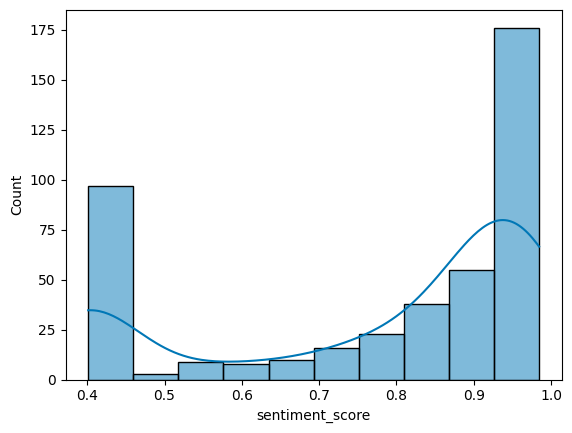

In [29]:
pos_sentiment = processed_data[processed_data['sentiment'] == "positive"]
sns.histplot(data=pos_sentiment, x='sentiment_score', color='#0077b6', kde=True)

<Axes: xlabel='sentiment_score', ylabel='Count'>

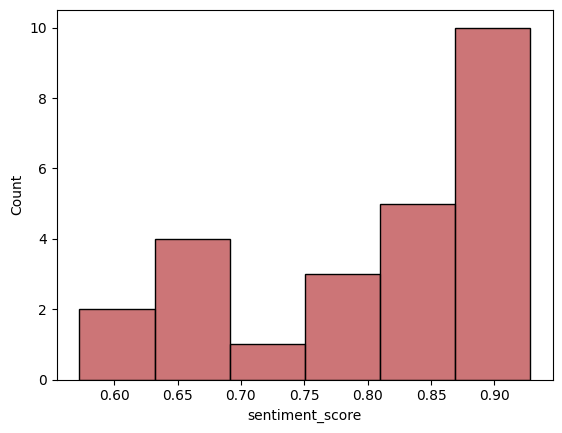

In [27]:
neg_sentiment = processed_data[processed_data['sentiment'] == "negative"]
sns.histplot(data=neg_sentiment, x='sentiment_score', color='#bc4749')

In [64]:
selected_feedback = processed_data[(processed_data['sentiment'] == "negative") & \
                                   (processed_data['sentiment_score'] >= 0.65)].sort_values(by='sentiment_score', ascending=False)






Doctor Consultations
No Improvement Suggestion
Overall Patient Satisfaction
Patient Participation Group
Phlebotomy Service & Blood Test Results
Poor Communication
Quality of Medical Advice
Reception Services
Referral Process
Telephone Service
Vaccinations
